In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Create some fake data

In [2]:
def f(x):
    return(2*x+1)
x1=3*np.random.randn(30,2)
a=np.min(x1)
b=np.max(x1)
x=np.linspace(a,b)
y1=f(x)

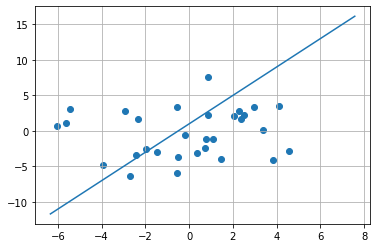

In [3]:
plt.scatter(x1[:,0],x1[:,1])
plt.plot(x,y1)
plt.grid()

In [4]:
def bound(x1,x2):
    y=np.zeros((x1.shape))
    for i in range(y.shape[0]):
        if (x2[i]<f(x1[i])):
            y[i]=-1
        else:
            y[i]=1
    return y

In [5]:
y_lab=bound(x1[:,0],x1[:,1])
print(y_lab)

[-1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]


In [6]:
#Create the dataset
def data(x):
    l=np.ones(x.shape[0])
    l=l.reshape(-1,1)
    X=np.concatenate((l,x),axis=1)
    return X

In [7]:
Xt=data(x1)
print(Xt)

[[ 1.          1.46480422 -3.96609123]
 [ 1.         -0.53813833  3.37290337]
 [ 1.         -2.44935254 -3.3798374 ]
 [ 1.         -2.95260665  2.86497694]
 [ 1.          0.3545808  -3.15240875]
 [ 1.          2.9486396   3.39922573]
 [ 1.          2.06861705  2.16319923]
 [ 1.          4.1265145   3.44633066]
 [ 1.          0.74570831 -2.38075134]
 [ 1.         -2.34567311  1.68341686]
 [ 1.         -5.62291833  1.16999521]
 [ 1.          1.07616477 -1.17256735]
 [ 1.         -3.95509681 -4.83105219]
 [ 1.         -0.56319496 -5.94895492]
 [ 1.          2.5251253   2.28470597]
 [ 1.         -6.05013993  0.7312113 ]
 [ 1.         -0.50523965 -3.69136769]
 [ 1.          0.7645542  -1.13222664]
 [ 1.          0.87210418  7.57315718]
 [ 1.         -5.43345062  3.04265199]
 [ 1.          4.58529093 -2.86890079]
 [ 1.          2.27949258  2.76601062]
 [ 1.         -1.4467298  -3.02212832]
 [ 1.          3.39812486  0.191313  ]
 [ 1.         -0.20996714 -0.51463225]
 [ 1.         -2.70839783

In [8]:
# Activation function
def inp(X,w):
    yhat=np.dot(X,w)
    for i in range(yhat.shape[0]):
        if yhat[i]>=0:
            yhat[i]=1
        else:
            yhat[i]=-1
    return yhat

In [9]:
#Learning algorithm
def learn(X,y,eta,num):
    w=0.1*np.zeros((X.shape[1]))
    y_hat=inp(X,w)
    for j in range(num):
        y_hat=inp(X,w)
        for i in range(X.shape[0]):
            w=w+eta*(y[i]-y_hat[i])*X[i]
        #y_hat=inp(X,w)
        error=np.sum(np.abs(y-y_hat))
        print('learning epoch %f , error: %f' % (j,  error))
    return (w)

In [10]:
wei=learn(Xt,y_lab,0.1,20)

learning epoch 0.000000 , error: 40.000000
learning epoch 1.000000 , error: 8.000000
learning epoch 2.000000 , error: 4.000000
learning epoch 3.000000 , error: 0.000000
learning epoch 4.000000 , error: 0.000000
learning epoch 5.000000 , error: 0.000000
learning epoch 6.000000 , error: 0.000000
learning epoch 7.000000 , error: 0.000000
learning epoch 8.000000 , error: 0.000000
learning epoch 9.000000 , error: 0.000000
learning epoch 10.000000 , error: 0.000000
learning epoch 11.000000 , error: 0.000000
learning epoch 12.000000 , error: 0.000000
learning epoch 13.000000 , error: 0.000000
learning epoch 14.000000 , error: 0.000000
learning epoch 15.000000 , error: 0.000000
learning epoch 16.000000 , error: 0.000000
learning epoch 17.000000 , error: 0.000000
learning epoch 18.000000 , error: 0.000000
learning epoch 19.000000 , error: 0.000000


## Now, using the iris dataset ##

In [11]:
datair=pd.read_csv('iris.data',header=None,encoding='utf-8')
datair.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


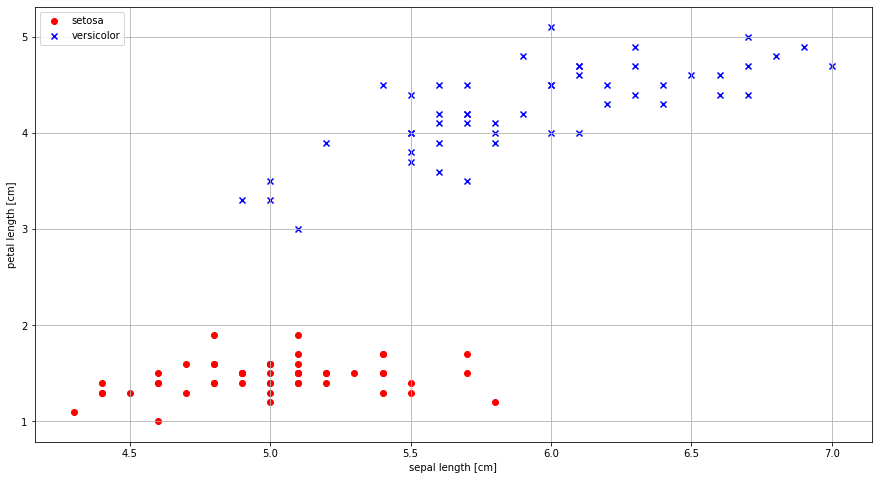

In [12]:
# select setosa and versicolor
y = datair.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = datair.iloc[0:100, [0, 2]].values

plt.figure(figsize=(15,8))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [13]:
X2=data(X)
wei=learn(X2,y,0.01,20)

learning epoch 0.000000 , error: 100.000000
learning epoch 1.000000 , error: 100.000000
learning epoch 2.000000 , error: 100.000000
learning epoch 3.000000 , error: 100.000000
learning epoch 4.000000 , error: 100.000000
learning epoch 5.000000 , error: 94.000000
learning epoch 6.000000 , error: 100.000000
learning epoch 7.000000 , error: 0.000000
learning epoch 8.000000 , error: 0.000000
learning epoch 9.000000 , error: 0.000000
learning epoch 10.000000 , error: 0.000000
learning epoch 11.000000 , error: 0.000000
learning epoch 12.000000 , error: 0.000000
learning epoch 13.000000 , error: 0.000000
learning epoch 14.000000 , error: 0.000000
learning epoch 15.000000 , error: 0.000000
learning epoch 16.000000 , error: 0.000000
learning epoch 17.000000 , error: 0.000000
learning epoch 18.000000 , error: 0.000000
learning epoch 19.000000 , error: 0.000000


In [14]:
class Perceptron(object):
    def __init__(self,epochn,eta):
        self.epochn=epochn
        self.eta=eta
        
    def learn(self,X,y):
        self.w = np.zeros((X.shape[1]))
        for j in range(self.epochn):
            for i in range(X.shape[0]):
                self.w=self.w+(self.eta)*(y[i]-self.act(X)[i])*X[i]
            #y_hat=self.act(self.inp(X,w))    
            error=np.sum(np.abs(y-self.act(X)))
            #print('learning epoch %f, error: %f' % (j,error))
        return (self.w)
        
    def inp(self,X):
        vec=np.dot(X,self.w)
        return vec
    
    def act(self,X):
        return np.where(self.inp(X) >= 0.0, 1, -1)
        

In [15]:
def test(Xte,w):
    yhat=np.dot(Xte,w)
    for i in range(yhat.shape[0]):
        if yhat[i]>=0:
            yhat[i]=1
        else:
            yhat[i]=-1
    return yhat

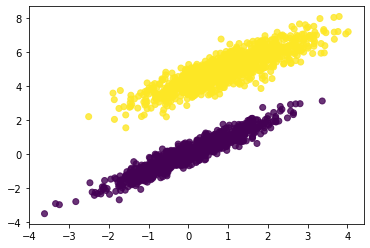

In [16]:
df = pd.read_csv("dataset.csv")
obs = 1000
plt.figure(0)
plt.scatter(df.values[:,1], df.values[:,2], c = df['3'], alpha=0.8)

In [17]:
df=df.values

In [18]:
df

array([[ 1.        , -0.38336209, -0.48799241,  0.        ],
       [ 1.        , -2.36033487, -2.44005346,  0.        ],
       [ 1.        , -0.35844329,  0.14198118,  0.        ],
       ...,
       [ 1.        ,  1.55024755,  4.89820576,  1.        ],
       [ 1.        ,  0.05916472,  4.65455151,  1.        ],
       [ 1.        ,  0.83748877,  5.21159935,  1.        ]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df[:,1:3]
y=df[:,3]

In [21]:
#Add the bias term to the X's
X=data(X)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
y_hat=test(X_test,weightsp)

NameError: name 'weightsp' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_hat,y_test))

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron( eta0=0.1, shuffle=False, fit_intercept=False)
clf.fit(X_train, y_train)

In [ ]:
y_predict = clf.predict(X_test)

print(clf.coef_[0])

In [ ]:
weightsp

The results obtained by using a unit step function when we are updating the weights could affect the result between our perceptron and the sklearn perceptron. Now, we are going to introduce a linear activation function and the gradient descent method. The idea of introducing the gradient descent is to minimize a cost function such as 

$J(w)=\frac{1}{2} \sum (y^{(i)}-\hat{y}^{(i)})^{2}$

In [ ]:
class PerceptronGD(object):
    def __init__(self,epoch,eta):
        self.epoch=epoch
        self.eta=eta
        
    def learn(self,X,y):
        self.w = np.zeros((X.shape[1]))
        for i in range(self.epoch):
            out=self.act(X)
            errors=(y-out)
            grad=X.T.dot(errors)
            self.w=self.w+self.eta*grad
        return (self.w)
        
    def inp(self,X):
        vec=np.dot(X,self.w)
        return vec
    
    def act(self,X):
        return np.where(self.inp(X) >= 0.0, 1, -1)

In [ ]:
wt = PerceptronGD(epoch=160, eta=0.001).learn(X_train, y_train)

In [ ]:
wt